In [1]:
import acquire as a
import prepare as p 
%matplotlib inline
import matplotlib as plt
import seaborn as sns

In [2]:
df = a.get_activity()

In [4]:
df = p.prep_activity(df)

In [11]:
df.head()

,total_burned,steps,distance,floors,sedentary,lightly,fairly,very,active_burned,bmr,time
date,,,,,,,,,,,
2018-04-26,2635,2931,1.38,2,1347,93,0,0,566,2069,1440
2018-04-27,3649,9971,4.70,19,1158,219,46,17,1752,1897,1440
2018-04-28,3379,3521,1.66,2,702,155,22,11,1124,2255,890
2018-04-29,2851,1639,0.77,0,891,122,0,0,602,2249,1013
2018-04-30,2825,1323,0.62,0,880,104,0,0,540,2285,984


In [6]:
df.describe()

,total_burned,steps,distance,floors,sedentary,lightly,fairly,very,active_burned,bmr,time
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,3401.911111,8536.186667,4.046800,12.591111,809.520000,188.235556,14.920000,33.871111,1484.546667,1917.364444,1046.546667
std,632.426578,5255.746608,2.506253,25.844174,243.232639,75.170001,15.363535,37.195986,747.795790,192.377351,187.948200
min,799.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,748.000000,41.000000
25%,3069.000000,4714.000000,2.220000,2.000000,654.000000,158.000000,3.000000,2.000000,1062.000000,1792.000000,940.000000
50%,3385.000000,7806.000000,3.680000,7.000000,750.000000,203.000000,11.000000,15.000000,1481.000000,1923.000000,996.000000
75%,3765.000000,12380.000000,5.900000,13.000000,877.000000,236.000000,21.000000,63.000000,1962.000000,2055.000000,1076.000000
max,5199.000000,25512.000000,12.000000,195.000000,1440.000000,349.000000,78.000000,154.000000,3596.000000,2291.000000,1440.000000


In [12]:
#Attempting to determine total calories burned at rest by looking only at the columns where "out of zone" is the only feature with a non zero value
df1 = df[(df.sedentary > 0) & (df.lightly==0) & (df.fairly==0) & (df.very==0)]
df1

,total_burned,steps,distance,floors,sedentary,lightly,fairly,very,active_burned,bmr,time
date,,,,,,,,,,,
2018-06-06,2145,0,0.0,0,1440,0,0,0,0,2145,1440
2018-06-07,2146,0,0.0,0,1440,0,0,0,0,2146,1440
2018-06-11,2146,0,0.0,0,1440,0,0,0,0,2146,1440
2018-06-26,2144,0,0.0,0,1440,0,0,0,0,2144,1440
2018-06-27,2145,0,0.0,0,1440,0,0,0,0,2145,1440
2018-06-28,2145,0,0.0,0,1440,0,0,0,0,2145,1440
2018-06-30,2145,0,0.0,0,1440,0,0,0,0,2145,1440
2018-07-03,2144,0,0.0,0,1440,0,0,0,0,2144,1440
2018-07-06,2144,0,0.0,0,1440,0,0,0,0,2144,1440


In [14]:
# getting average of values found in previouse cell
df1.total_burned.mean()

2144.8888888888887

## Evidence for Gender
The average daily amount of calories burned by gender is:

1600-2400 for females 

2000-3000 for males

the main determining factor in where an individual falls in this estimation is activity.
The more activity a person has the higher the amount of calories they will burn.

The person wearing the fitbit has a estimated 2145 calories burned on the days that they were sedintary.

With this amount of calories burned in a day we would expect the individual in question to be a male with low activity  or a female with moderate activity because of where the number falls withen each estimit.

Because we know that the person in question is sedintary during this time the evidence suggests that the wearer of the fit bit is male

# Evedence for Activity Amounts

Fitbit has listed four heartrate zones that is tracks:

## OUT OF ZONE
Below 50% of your maximum heart rate
Your heart rate may be elevated, but not enough to be considered exercise.

## FAT BURN ZONE
Between 50% and 69% of your maximum heart rate
This low-to-medium intensity exercise zone may be a good place to start for those new to exercise. It’s called the fat burn zone because a higher percentage of calories are burned from fat, but the total calorie burn rate is lower than more intense exercise zones.

## CARDIO ZONE
Between 70% and 84% of your maximum heart rate.
In this medium-to-high intensity exercise zone, you're pushing yourself but not straining. Most people should target this exercise zone.

## PEAK ZONE
Greater than 85% of your maximum heart rate.
This high-intensity exercise zone is for short, intense sessions that improve performance and speed.

It is likely that these zones are reflected in the four intensity of activity features that are in the dataset and explain how those numbers are measured.

In [19]:
150/7

21.428571428571427

In [20]:
75/7

10.714285714285714

# Evidence for lable swap

it is recomended that healthy adults get at least 150 minutes of moderate aerobic activity or 75 minutes of vigorouse aerobic activity per day.

This comes to roughly 21 minutes of moderate activity per day 

or 11 minutes of of vigorouse activity per day

What was labeled as very active in the data averaged to about 34 min per day.

What was labeled fairly active averaged about 11 min.

These averages make more sence if they are the result of an unfortunate lable swap.

Vigerouse aerobic activity is also recomended in short bursts looking at how fairly and very plot next to each other 

it makes more sence to infer that the labels are swapped.

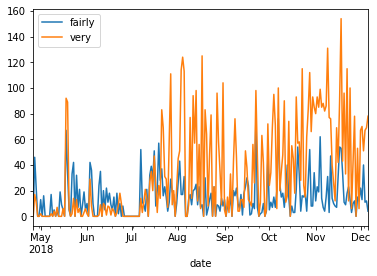

In [27]:
df[['fairly', 'very']].plot.line()

# Evidence for Weight

Metabolic equivalent(MTE), is a of measure of how intence an activity it. It can be used to determine how many calories a person will burn in one hour. An MTE of one is roughly equivalent to the energy cost of sitting quietly
The calculation is as follows:

MET * weight(in kilos) = calories burned in one hour

Using the sedentary data from earlyer we can use this formula to estimate the weight of the person wearing the fitbit at an MET of 1

1 * weight(in kilos) = 2145 calories burned in a day at rest /24

weight in kilos = 89

weight in lbs = 196








In [28]:
2145/24

89.375

In [ ]:
df.index[-1]

BMR is the number of calories a person burns by simply existing. BMR varies based on age, sex, size, and genetics. To calculate BMR, a person uses inches for height, pounds for weight, and years for age in the following formulas:

For men: 66 + (6.2 x weight) + (12.7 x height) - (6.76 x age)
For women: 655.1 + (4.35 x weight) + (4.7 x height) - (4.7 x age)

In [ ]:
df['2018-06-01':'2018-06-07'].very.plot(color='firebrick')
#df['2018-06-08':'2018-06-14'].very.resample('w').plot(color='firebrick')

plt.show()


	
## OUT OF ZONE

Below 50% of your maximum heart rate	
Your heart rate may be elevated, but not enough to be considered exercise.

	
## FAT BURN ZONE

Between 50% and 69% of your maximum heart rate	
This low-to-medium intensity exercise zone may be a good place to start for those new to exercise. It’s called the fat burn zone because a higher percentage of calories are burned from fat, but the total calorie burn rate is lower than more intense exercise zones.

	
## CARDIO ZONE

Between 70% and 84% of your maximum heart rate.	
In this medium-to-high intensity exercise zone, you're pushing yourself but not straining. Most people should target this exercise zone.

## PEAK ZONE

Greater than 85% of your maximum heart rate.	
This high-intensity exercise zone is for short, intense sessions that improve performance and speed.

## HOW DOES MY FITBIT DEVICE DETECT MY HEART RATE?
When your heart beats, your capillaries expand and contract based on blood volume changes. To determine your heart rate, the optical heart-rate sensor in your Fitbit device flashes its green LEDs hundreds of times per second and uses light-sensitive photodiodes to detect these volume changes in the capillaries above your wrist. Then your device calculates how many times your heart beats per minute (BPM). The optical heart-rate sensor detects a range of 30-220 BPM.*

We use green LEDS because they maximize the signal detected from the capillaries near the surface of the skin. The optical heart-rate sensor also uses infrared light to determine when the device is on your wrist to improve the accuracy of your heart-rate data.


In [9]:
2145/24

89.375

In [ ]:
df.burned.value_counts(ascending=False)

In [17]:
df2 = df[df.time >= 1440]
df2.shape

(29, 11)

In [18]:
1440/60

24.0

In [ ]:
from 